## To do 
1. Do EDA with MNIST and Fashion MNIST
2. make normalize method separately
3. Do 3 more techniques of preprocessing 
4. Get plots for preprocessing
5. Get plots for comparisons between activation function for both datasets
5. theory about how to design and choose activations pondering
6. One self created activation function / just for fun / get

In [18]:
random_seed=7
from numpy.random import seed
seed(random_seed)
from tensorflow import set_random_seed
set_random_seed(random_seed)
import numpy as np
from IPython.display import clear_output
import sys
sys.path.append('../exploringActivations/')
from data import Datasets
from activation_functions import CustomActivation
from models import CNN,DNN,CAE
import matplotlib.pyplot as plt
import scipy as sci
from keras.datasets import mnist
from keras.datasets import fashion_mnist

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
import pandas as pd
from tensorflow.keras import backend as K
import math
import matplotlib.pyplot as plt
import os
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects
from keras.activations import sigmoid, selu

In [3]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

In [5]:
act=CustomActivation()

In [39]:
def plot_model(history,name,modelname,datasetname):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title(name+'-'+modelname+'model accuracy on'+datasetname)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    #fig= plt.figure()
    plt.savefig(name+'_'+modelname+'_'+datasetname)
    plt.show()


(60000, 784)
(60000, 784)
(10000, 784)
(10000,)
(60000,)
Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3525 - acc: 0.8999 - val_loss: 0.1971 - val_acc: 0.9434
Epoch 2/500
60000/60000 [==============================] - 3s 44us/sample - loss: 0.1677 - acc: 0.9506 - val_loss: 0.1287 - val_acc: 0.9616
Epoch 3/500
60000/60000 [==============================] - 3s 44us/sample - loss: 0.1138 - acc: 0.9670 - val_loss: 0.1027 - val_acc: 0.9682
Epoch 4/500
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0877 - acc: 0.9742 - val_loss: 0.0869 - val_acc: 0.9752
Epoch 5/500
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0702 - acc: 0.9791 - val_loss: 0.0767 - val_acc: 0.9765
Epoch 6/500
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0575 - acc: 0.9834 - val_loss: 0.0740 - val_acc: 0.9768
Epoch 7/500
60000/60000 [============================

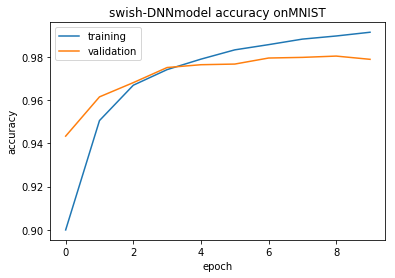

(60000, 784)
(60000, 784)
(10000, 784)
(10000,)
(60000,)
Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3780 - acc: 0.8896 - val_loss: 0.3026 - val_acc: 0.9142
Epoch 2/500
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2633 - acc: 0.9239 - val_loss: 0.2259 - val_acc: 0.9322
Epoch 3/500
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2000 - acc: 0.9425 - val_loss: 0.1741 - val_acc: 0.9505
Epoch 4/500
60000/60000 [==============================] - 3s 44us/sample - loss: 0.1549 - acc: 0.9552 - val_loss: 0.1543 - val_acc: 0.9543
Epoch 5/500
60000/60000 [==============================] - 3s 45us/sample - loss: 0.1249 - acc: 0.9638 - val_loss: 0.1255 - val_acc: 0.9650
Epoch 6/500
60000/60000 [==============================] - 3s 45us/sample - loss: 0.1035 - acc: 0.9694 - val_loss: 0.1193 - val_acc: 0.9642
Epoch 7/500
60000/60000 [============================

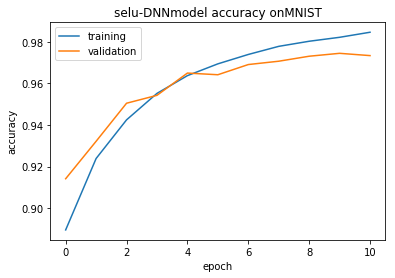

(60000, 784)
(60000, 784)
(10000, 784)
(10000,)
(60000,)
Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3225 - acc: 0.9079 - val_loss: 0.1693 - val_acc: 0.9508
Epoch 2/500
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1406 - acc: 0.9592 - val_loss: 0.1101 - val_acc: 0.9663
Epoch 3/500
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0944 - acc: 0.9720 - val_loss: 0.0863 - val_acc: 0.9754
Epoch 4/500
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0711 - acc: 0.9794 - val_loss: 0.0848 - val_acc: 0.9735
Epoch 5/500
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0565 - acc: 0.9834 - val_loss: 0.0743 - val_acc: 0.9761
Epoch 6/500
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0456 - acc: 0.9870 - val_loss: 0.0667 - val_acc: 0.9792
Epoch 7/500
60000/60000 [============================

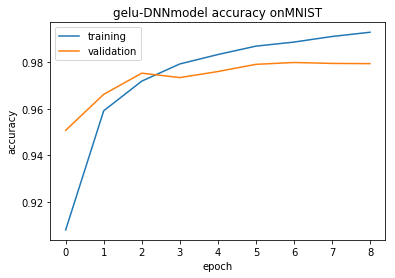

(60000, 784)
(60000, 784)
(10000, 784)
(10000,)
(60000,)
Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3009 - acc: 0.9151 - val_loss: 0.1631 - val_acc: 0.9512
Epoch 2/500
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1295 - acc: 0.9628 - val_loss: 0.1151 - val_acc: 0.9639
Epoch 3/500
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0884 - acc: 0.9743 - val_loss: 0.0848 - val_acc: 0.9744
Epoch 4/500
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0660 - acc: 0.9810 - val_loss: 0.0738 - val_acc: 0.9778
Epoch 5/500
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0523 - acc: 0.9848 - val_loss: 0.0704 - val_acc: 0.9759
Epoch 6/500
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0417 - acc: 0.9883 - val_loss: 0.0675 - val_acc: 0.9789
Epoch 7/500
60000/60000 [============================

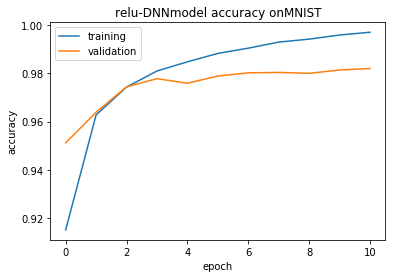

(60000, 784)
(60000, 784)
(10000, 784)
(10000,)
(60000,)
Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 3s 51us/sample - loss: 0.5796 - acc: 0.7955 - val_loss: 0.4722 - val_acc: 0.8313
Epoch 2/500
60000/60000 [==============================] - 3s 44us/sample - loss: 0.4144 - acc: 0.8489 - val_loss: 0.4650 - val_acc: 0.8190
Epoch 3/500
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3701 - acc: 0.8647 - val_loss: 0.3991 - val_acc: 0.8534
Epoch 4/500
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3405 - acc: 0.8749 - val_loss: 0.4271 - val_acc: 0.8489
Epoch 00004: early stopping


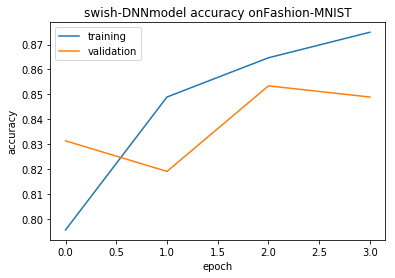

(60000, 784)
(60000, 784)
(10000, 784)
(10000,)
(60000,)
Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 3s 52us/sample - loss: 0.6945 - acc: 0.7715 - val_loss: 0.4702 - val_acc: 0.8334
Epoch 2/500
60000/60000 [==============================] - 3s 44us/sample - loss: 0.4797 - acc: 0.8282 - val_loss: 0.4744 - val_acc: 0.8290
Epoch 00002: early stopping


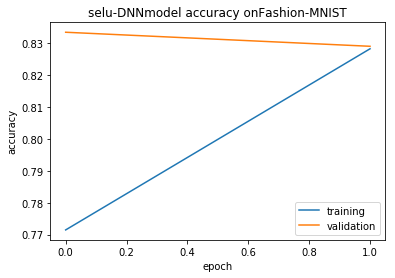

(60000, 784)
(60000, 784)
(10000, 784)
(10000,)
(60000,)
Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 3s 56us/sample - loss: 0.5656 - acc: 0.8014 - val_loss: 0.5091 - val_acc: 0.8076
Epoch 2/500
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3966 - acc: 0.8542 - val_loss: 0.4404 - val_acc: 0.8328
Epoch 3/500
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3504 - acc: 0.8717 - val_loss: 0.3657 - val_acc: 0.8683
Epoch 4/500
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3229 - acc: 0.8812 - val_loss: 0.3604 - val_acc: 0.8697
Epoch 5/500
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3020 - acc: 0.8890 - val_loss: 0.3460 - val_acc: 0.8729
Epoch 6/500
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2850 - acc: 0.8952 - val_loss: 0.3560 - val_acc: 0.8714
Epoch 00006: early stopping


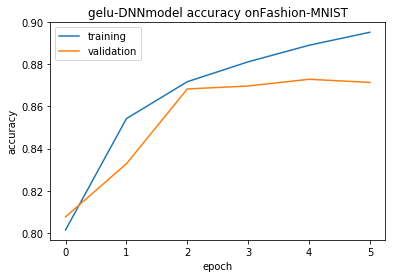

(60000, 784)
(60000, 784)
(10000, 784)
(10000,)
(60000,)
Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 3s 52us/sample - loss: 0.5740 - acc: 0.7977 - val_loss: 0.4930 - val_acc: 0.8180
Epoch 2/500
60000/60000 [==============================] - 3s 43us/sample - loss: 0.4040 - acc: 0.8541 - val_loss: 0.4143 - val_acc: 0.8504
Epoch 3/500
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3563 - acc: 0.8693 - val_loss: 0.4018 - val_acc: 0.8563
Epoch 4/500
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3295 - acc: 0.8789 - val_loss: 0.3699 - val_acc: 0.8621
Epoch 5/500
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3086 - acc: 0.8858 - val_loss: 0.3547 - val_acc: 0.8680
Epoch 6/500
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2915 - acc: 0.8914 - val_loss: 0.3585 - val_acc: 0.8710
Epoch 00006: early stopping


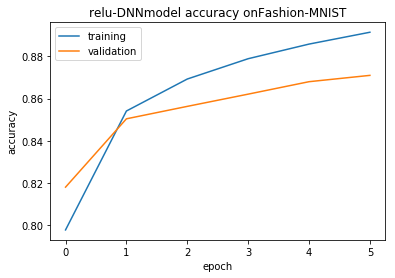

In [42]:
#testing for DNN
dataset_list=['MNIST', 'Fashion-MNIST']
activation_list=['swish','selu', 'gelu', 'relu']
modelname="DNN"
for dataset_name in dataset_list:
    for name in activation_list:
        dataset=Datasets()
        if(dataset_name =='MNIST'): 
            x_train,x_test,y_train,y_test=dataset.get_mnist("DNN")
        elif(dataset_name=='Fashion-MNIST'):
            x_train,x_test,y_train,y_test=dataset.get_fashion_mnist("DNN")
        num_classes=dataset.num_classes
        input_shape=dataset.input_shape
        print(input_shape)
        print(x_train.shape)
        print(x_test.shape)
        print(y_test.shape)
        print(y_train.shape)
        dnn = DNN(name)
        score,history = dnn.run_model(input_shape, x_train, x_test, y_train, y_test,1)
        plot_model(history,name,modelname,dataset_name)

(28, 28, 1)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)
(60000,)
Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 13s 215us/sample - loss: 0.8434 - acc: 0.6949 - val_loss: 0.1566 - val_acc: 0.9502
Epoch 2/500
60000/60000 [==============================] - 12s 201us/sample - loss: 0.1326 - acc: 0.9584 - val_loss: 0.0992 - val_acc: 0.9674
Epoch 3/500
60000/60000 [==============================] - 12s 200us/sample - loss: 0.0954 - acc: 0.9708 - val_loss: 0.0740 - val_acc: 0.9757
Epoch 4/500
60000/60000 [==============================] - 12s 200us/sample - loss: 0.0780 - acc: 0.9765 - val_loss: 0.0798 - val_acc: 0.9742
Epoch 00004: early stopping


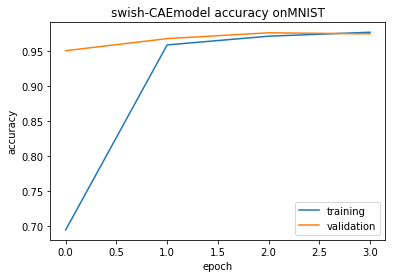

(28, 28, 1)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)
(60000,)
Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 15s 251us/sample - loss: 0.3138 - acc: 0.8984 - val_loss: 0.1609 - val_acc: 0.9494
Epoch 2/500
60000/60000 [==============================] - 14s 236us/sample - loss: 0.1319 - acc: 0.9588 - val_loss: 0.1437 - val_acc: 0.9557
Epoch 3/500
60000/60000 [==============================] - 14s 236us/sample - loss: 0.1001 - acc: 0.9682 - val_loss: 0.0932 - val_acc: 0.9702
Epoch 4/500
60000/60000 [==============================] - 14s 231us/sample - loss: 0.0814 - acc: 0.9743 - val_loss: 0.0647 - val_acc: 0.9787
Epoch 5/500
60000/60000 [==============================] - 14s 229us/sample - loss: 0.0705 - acc: 0.9781 - val_loss: 0.0708 - val_acc: 0.9779
Epoch 00005: early stopping


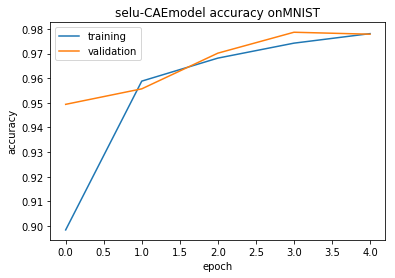

(28, 28, 1)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)
(60000,)
Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 28s 473us/sample - loss: 0.5971 - acc: 0.7995 - val_loss: 0.1673 - val_acc: 0.9436
Epoch 2/500
60000/60000 [==============================] - 27s 450us/sample - loss: 0.1212 - acc: 0.9626 - val_loss: 0.0866 - val_acc: 0.9714
Epoch 3/500
60000/60000 [==============================] - 28s 463us/sample - loss: 0.0898 - acc: 0.9711 - val_loss: 0.0699 - val_acc: 0.9776
Epoch 4/500
60000/60000 [==============================] - 27s 457us/sample - loss: 0.0734 - acc: 0.9765 - val_loss: 0.0670 - val_acc: 0.9776
Epoch 5/500
60000/60000 [==============================] - 28s 461us/sample - loss: 0.0633 - acc: 0.9799 - val_loss: 0.0612 - val_acc: 0.9790
Epoch 6/500
60000/60000 [==============================] - 28s 462us/sample - loss: 0.0562 - acc: 0.9821 - val_loss: 0.0534 - val_acc: 0.9825
Epoch 7/500
60000/60000 [=====

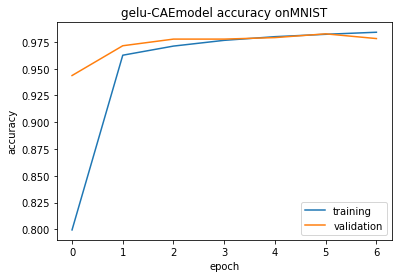

(28, 28, 1)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)
(60000,)
Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 10s 174us/sample - loss: 0.3722 - acc: 0.8789 - val_loss: 0.1322 - val_acc: 0.9572
Epoch 2/500
60000/60000 [==============================] - 9s 152us/sample - loss: 0.1107 - acc: 0.9654 - val_loss: 0.0742 - val_acc: 0.9753
Epoch 3/500
60000/60000 [==============================] - 9s 158us/sample - loss: 0.0884 - acc: 0.9726 - val_loss: 0.0755 - val_acc: 0.9769
Epoch 00003: early stopping


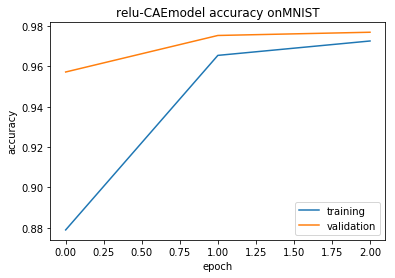

(28, 28, 1)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)
(60000,)
Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 18s 304us/sample - loss: 0.8790 - acc: 0.6758 - val_loss: 0.5339 - val_acc: 0.8051
Epoch 2/500
60000/60000 [==============================] - 12s 200us/sample - loss: 0.4736 - acc: 0.8280 - val_loss: 0.4627 - val_acc: 0.8295
Epoch 3/500
60000/60000 [==============================] - 12s 200us/sample - loss: 0.4158 - acc: 0.8495 - val_loss: 0.4309 - val_acc: 0.8436
Epoch 4/500
60000/60000 [==============================] - 12s 200us/sample - loss: 0.3845 - acc: 0.8601 - val_loss: 0.3945 - val_acc: 0.8532
Epoch 5/500
60000/60000 [==============================] - 12s 200us/sample - loss: 0.3637 - acc: 0.8674 - val_loss: 0.3702 - val_acc: 0.8676
Epoch 6/500
60000/60000 [==============================] - 12s 200us/sample - loss: 0.3450 - acc: 0.8734 - val_loss: 0.3739 - val_acc: 0.8653
Epoch 00006: early stopping


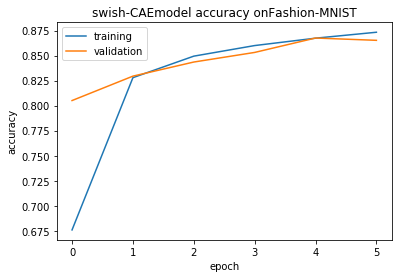

(28, 28, 1)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)
(60000,)
Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 15s 254us/sample - loss: 0.5681 - acc: 0.7942 - val_loss: 0.4797 - val_acc: 0.8193
Epoch 2/500
60000/60000 [==============================] - 15s 243us/sample - loss: 0.4077 - acc: 0.8530 - val_loss: 0.3901 - val_acc: 0.8571
Epoch 3/500
60000/60000 [==============================] - 14s 238us/sample - loss: 0.3724 - acc: 0.8657 - val_loss: 0.4050 - val_acc: 0.8501
Epoch 00003: early stopping


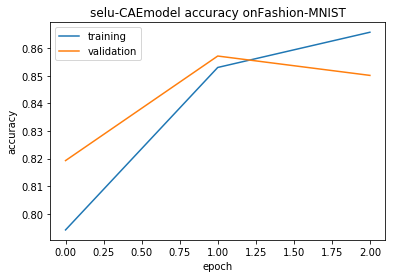

(28, 28, 1)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)
(60000,)
Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 29s 480us/sample - loss: 0.8450 - acc: 0.6854 - val_loss: 0.5188 - val_acc: 0.8075
Epoch 2/500
60000/60000 [==============================] - 28s 459us/sample - loss: 0.4550 - acc: 0.8301 - val_loss: 0.4427 - val_acc: 0.8358
Epoch 3/500
60000/60000 [==============================] - 29s 478us/sample - loss: 0.3980 - acc: 0.8522 - val_loss: 0.4109 - val_acc: 0.8502
Epoch 4/500
60000/60000 [==============================] - 27s 457us/sample - loss: 0.3655 - acc: 0.8642 - val_loss: 0.3898 - val_acc: 0.8580
Epoch 5/500
60000/60000 [==============================] - 28s 459us/sample - loss: 0.3430 - acc: 0.8735 - val_loss: 0.3799 - val_acc: 0.8609
Epoch 6/500
60000/60000 [==============================] - 27s 457us/sample - loss: 0.3262 - acc: 0.8795 - val_loss: 0.3715 - val_acc: 0.8642
Epoch 7/500
60000/60000 [=====

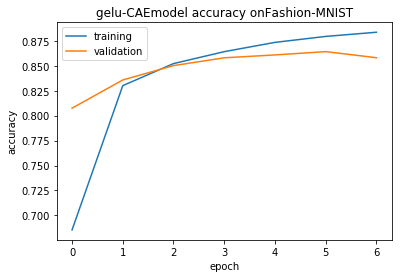

(28, 28, 1)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)
(60000,)
Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 12s 193us/sample - loss: 0.7553 - acc: 0.7223 - val_loss: 0.4874 - val_acc: 0.8142
Epoch 2/500
60000/60000 [==============================] - 10s 160us/sample - loss: 0.4160 - acc: 0.8457 - val_loss: 0.4044 - val_acc: 0.8547
Epoch 3/500
60000/60000 [==============================] - 10s 161us/sample - loss: 0.3706 - acc: 0.8630 - val_loss: 0.3757 - val_acc: 0.8653
Epoch 4/500
60000/60000 [==============================] - 10s 163us/sample - loss: 0.3463 - acc: 0.8729 - val_loss: 0.3653 - val_acc: 0.8686
Epoch 5/500
60000/60000 [==============================] - 10s 159us/sample - loss: 0.3268 - acc: 0.8793 - val_loss: 0.3614 - val_acc: 0.8650
Epoch 6/500
60000/60000 [==============================] - 10s 159us/sample - loss: 0.3157 - acc: 0.8844 - val_loss: 0.3623 - val_acc: 0.8725
Epoch 00006: early stopping


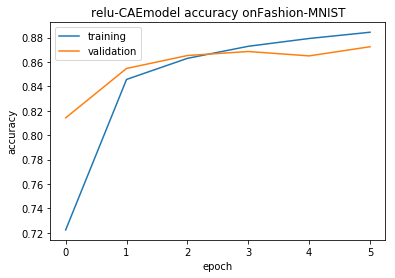

In [43]:
#testing for Convoluted Auto encoders
dataset_list=['MNIST', 'Fashion-MNIST']
activation_list=['swish','selu', 'gelu', 'relu']
modelname="CAE"
for dataset_name in dataset_list:
    for name in activation_list:
        dataset=Datasets()
        if(dataset_name =='MNIST'): 
            x_train,x_test,y_train,y_test=dataset.get_mnist("CNN")
        elif(dataset_name=='Fashion-MNIST'):
            x_train,x_test,y_train,y_test=dataset.get_fashion_mnist("CNN")
        num_classes=dataset.num_classes
        input_shape=dataset.input_shape
        print(input_shape)
        print(x_train.shape)
        print(x_test.shape)
        print(y_test.shape)
        print(y_train.shape)
        dnn = CAE(name)
        score,history = dnn.run_model(input_shape, x_train, x_test, y_train, y_test)
        plot_model(history,name,modelname,dataset_name)

(28, 28, 1)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)
(60000,)
Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 8s 130us/sample - loss: 0.2875 - acc: 0.9113 - val_loss: 0.0674 - val_acc: 0.9788
Epoch 2/500
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0890 - acc: 0.9737 - val_loss: 0.0451 - val_acc: 0.9846
Epoch 3/500
60000/60000 [==============================] - 7s 125us/sample - loss: 0.0643 - acc: 0.9810 - val_loss: 0.0391 - val_acc: 0.9866
Epoch 4/500
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0523 - acc: 0.9840 - val_loss: 0.0334 - val_acc: 0.9887
Epoch 5/500
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0444 - acc: 0.9870 - val_loss: 0.0294 - val_acc: 0.9908
Epoch 6/500
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0396 - acc: 0.9880 - val_loss: 0.0312 - val_acc: 0.9893
Epoch 00006: early stopping


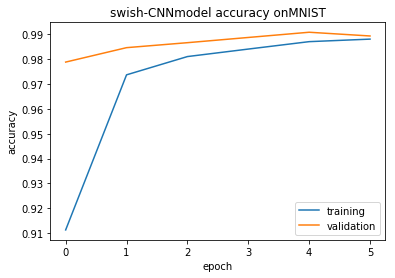

(28, 28, 1)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)
(60000,)
Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 9s 151us/sample - loss: 0.2546 - acc: 0.9236 - val_loss: 0.0854 - val_acc: 0.9729
Epoch 2/500
60000/60000 [==============================] - 9s 147us/sample - loss: 0.1171 - acc: 0.9643 - val_loss: 0.0738 - val_acc: 0.9770
Epoch 3/500
60000/60000 [==============================] - 9s 143us/sample - loss: 0.0928 - acc: 0.9710 - val_loss: 0.0654 - val_acc: 0.9788
Epoch 4/500
60000/60000 [==============================] - 9s 144us/sample - loss: 0.0791 - acc: 0.9759 - val_loss: 0.0545 - val_acc: 0.9823
Epoch 5/500
60000/60000 [==============================] - 9s 143us/sample - loss: 0.0697 - acc: 0.9786 - val_loss: 0.0600 - val_acc: 0.9819
Epoch 00005: early stopping


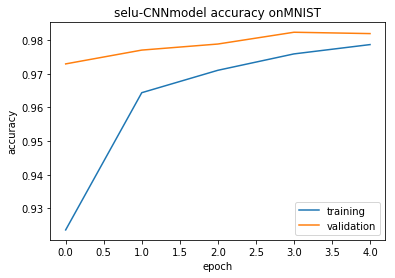

(28, 28, 1)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)
(60000,)
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 18s 292us/sample - loss: 0.2660 - acc: 0.9187 - val_loss: 0.0564 - val_acc: 0.9815
Epoch 2/500
60000/60000 [==============================] - 17s 283us/sample - loss: 0.0810 - acc: 0.9762 - val_loss: 0.0412 - val_acc: 0.9866
Epoch 3/500
60000/60000 [==============================] - 17s 282us/sample - loss: 0.0624 - acc: 0.9814 - val_loss: 0.0375 - 

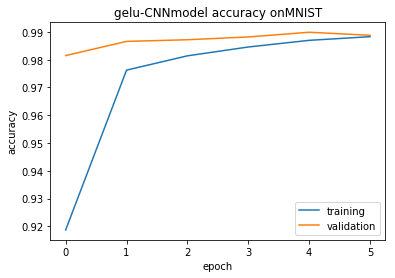

(28, 28, 1)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)
(60000,)
Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2667 - acc: 0.9175 - val_loss: 0.0598 - val_acc: 0.9806
Epoch 2/500
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0902 - acc: 0.9735 - val_loss: 0.0472 - val_acc: 0.9844
Epoch 3/500
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0680 - acc: 0.9798 - val_loss: 0.0312 - val_acc: 0.9893
Epoch 4/500
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0551 - acc: 0.9836 - val_loss: 0.0350 - val_acc: 0.9883
Epoch 00004: early stopping


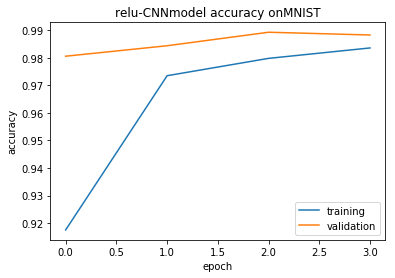

(28, 28, 1)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)
(60000,)
Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 8s 132us/sample - loss: 0.5734 - acc: 0.7953 - val_loss: 0.3901 - val_acc: 0.8586
Epoch 2/500
60000/60000 [==============================] - 7s 124us/sample - loss: 0.3734 - acc: 0.8652 - val_loss: 0.3353 - val_acc: 0.8770
Epoch 3/500
60000/60000 [==============================] - 7s 124us/sample - loss: 0.3238 - acc: 0.8825 - val_loss: 0.3052 - val_acc: 0.8867
Epoch 4/500
60000/60000 [==============================] - 7s 124us/sample - loss: 0.2949 - acc: 0.8922 - val_loss: 0.2855 - val_acc: 0.8960
Epoch 5/500
60000/60000 [==============================] - 7s 125us/sample - loss: 0.2717 - acc: 0.9003 - val_loss: 0.2649 - val_acc: 0.9021
Epoch 6/500
60000/60000 [==============================] - 7s 124us/sample - loss: 0.2568 - acc: 0.9064 - val_loss: 0.2556 - val_acc: 0.9040
Epoch 7/500
60000/60000 [===========

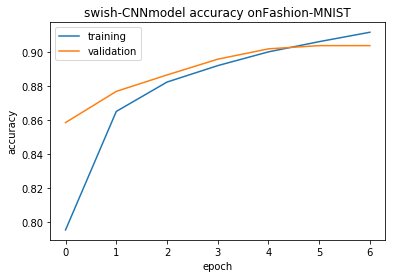

(28, 28, 1)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)
(60000,)
Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 9s 153us/sample - loss: 0.5144 - acc: 0.8257 - val_loss: 0.3475 - val_acc: 0.8779
Epoch 2/500
60000/60000 [==============================] - 9s 145us/sample - loss: 0.3533 - acc: 0.8776 - val_loss: 0.3280 - val_acc: 0.8852
Epoch 3/500
60000/60000 [==============================] - 9s 145us/sample - loss: 0.3123 - acc: 0.8912 - val_loss: 0.2965 - val_acc: 0.8964
Epoch 4/500
60000/60000 [==============================] - 9s 146us/sample - loss: 0.2874 - acc: 0.8980 - val_loss: 0.2953 - val_acc: 0.8967
Epoch 5/500
60000/60000 [==============================] - 9s 145us/sample - loss: 0.2722 - acc: 0.9035 - val_loss: 0.3013 - val_acc: 0.8945
Epoch 00005: early stopping


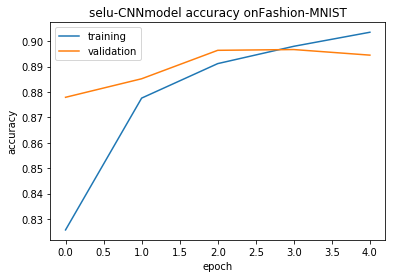

(28, 28, 1)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)
(60000,)
Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 18s 294us/sample - loss: 0.5468 - acc: 0.8009 - val_loss: 0.3792 - val_acc: 0.8608
Epoch 2/500
60000/60000 [==============================] - 17s 283us/sample - loss: 0.3594 - acc: 0.8706 - val_loss: 0.3233 - val_acc: 0.8827
Epoch 3/500
60000/60000 [==============================] - 17s 283us/sample - loss: 0.3123 - acc: 0.8858 - val_loss: 0.2914 - val_acc: 0.8924
Epoch 4/500
60000/60000 [==============================] - 17s 283us/sample - loss: 0.2821 - acc: 0.8971 - val_loss: 0.2789 - val_acc: 0.8976
Epoch 5/500
60000/60000 [==============================] - 17s 284us/sample - loss: 0.2606 - acc: 0.9061 - val_loss: 0.2667 - val_acc: 0.9038
Epoch 6/500
60000/60000 [==============================] - 17s 285us/sample - loss: 0.2421 - acc: 0.9112 - val_loss: 0.2634 - val_acc: 0.9045
Epoch 7/500
60000/60000 [=====

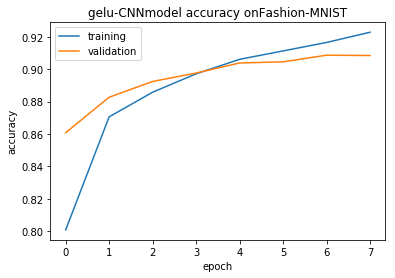

(28, 28, 1)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)
(60000,)
Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 6s 102us/sample - loss: 0.5755 - acc: 0.7969 - val_loss: 0.3637 - val_acc: 0.8679
Epoch 2/500
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3649 - acc: 0.8691 - val_loss: 0.3077 - val_acc: 0.8888
Epoch 3/500
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3135 - acc: 0.8874 - val_loss: 0.2866 - val_acc: 0.8959
Epoch 4/500
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2811 - acc: 0.8982 - val_loss: 0.2560 - val_acc: 0.9042
Epoch 5/500
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2580 - acc: 0.9076 - val_loss: 0.2651 - val_acc: 0.9044
Epoch 00005: early stopping


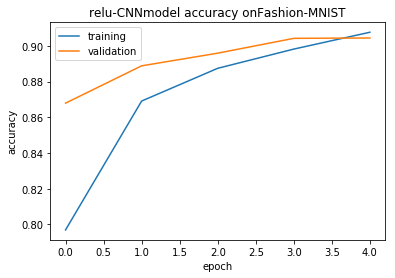

In [40]:
#testing for CNN
dataset_list=['MNIST', 'Fashion-MNIST']
activation_list=['swish','selu', 'gelu', 'relu']
modelname="CNN"
for dataset_name in dataset_list:
    for name in activation_list: 
        dataset=Datasets()
        if(dataset_name =='MNIST'): 
            x_train,x_test,y_train,y_test=dataset.get_mnist("CNN")
        elif(dataset_name=='Fashion-MNIST'):
            x_train,x_test,y_train,y_test=dataset.get_fashion_mnist("CNN")
        num_classes=dataset.num_classes
        input_shape=dataset.input_shape
        # x_train=dataset.edge_detection(x_train)
        # x_test=dataset.edge_detection(x_test)
        print(input_shape)
        print(x_train.shape)
        print(x_test.shape)
        print(y_test.shape)
        print(y_train.shape)
        cnn = CNN(name)
        model,history=cnn.run_model(input_shape, x_train, x_test, y_train, y_test)
        plot_model(history,name,modelname,dataset_name)

# EDA 

In [ ]:
dataset=Datasets()
x_train,x_test,y_train,y_test=dataset.get_fashion_mnist("CNN")
num_classes=dataset.num_classes
input_shape=dataset.input_shape
# x_train=dataset.edge_detection(x_train)
# x_test=dataset.edge_detection(x_test)
print(input_shape)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print(unique_elements)
print(counts_elements)


In [11]:
x_train[0].shape

(28, 28, 1)

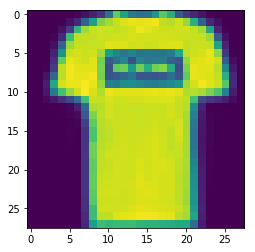

In [31]:
x_geo=dataset.filtering(x_train[1,:,:,0])
plt.imshow(x_geo)
plt.savefig('../results/filtered_images.png')

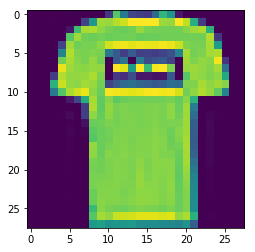

In [33]:
plt.imshow(x_train[1,:,:,0])
plt.savefig('../results/normal_images.png')

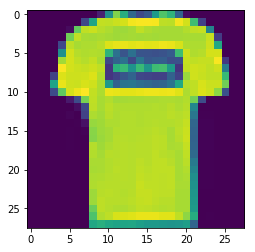

In [34]:
x_den=dataset.denoising(x_train[1,:,:,0])
plt.imshow(x_den)
plt.savefig('../results/denoised_images.png')

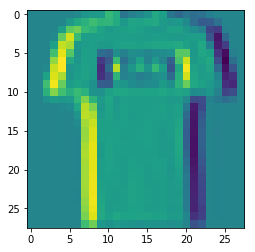

In [35]:
x_ed=dataset.edge_detection(x_train[1,:,:,0])
plt.imshow(x_ed)
plt.savefig('../results/edge_images.png')